# **Quadras**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sns

In [2]:
conn = sqlite3.connect('../db.sqlite3')
cur = conn.cursor()

query = '''
SELECT * 
FROM base_quadra
'''

df = pd.read_sql(query, con = conn)

cur.close()
conn.close()

df.head()

,tipo,rua,CEP,cidade,estado,alugada,telefone,estrelas,valor_hora,horario_abertura,horario_fechamento,descricao
0,Vôlei,Viaduto João Gabriel Pinto,97342-658,Vieira,PA,0,21 3197-9558,1,43,8,16,Cerveja gelada
1,Futsal,Lagoa Dias,19286197,Ramos dos Dourados,SP,1,+55 31 1446 9531,0,7,8,17,Cerveja gelada
2,Futsal,Passarela das Neves,77459-359,Fogaça,RO,0,(061) 6147 6958,3,15,11,16,Cerveja gelada
3,Vôlei,Estação Davi Lucas Viana,85868269,Nogueira,PB,1,+55 (061) 1002-8002,4,31,9,16,Localização ótima
4,Basquete,Setor Nunes,36396214,Monteiro de Martins,MA,1,+55 (081) 5686 7143,0,14,7,19,Espaço fechado


In [3]:
flt = df[['estado', 'descricao', 'estrelas', 'valor_hora', 'tipo']]

Algumas questões surgem quando pensamos na divisão das quadras. Em primeiro lugar, devemos pensar a respeito da distribuição delas: 
o número de quadras oferecido para cada esporte é semelhante? Vejamos:

[Text(0.5, 1.0, 'Quantidade de quadras para cada esporte'),
 Text(0.5, 0, 'Esporte'),
 Text(0, 0.5, 'n')]

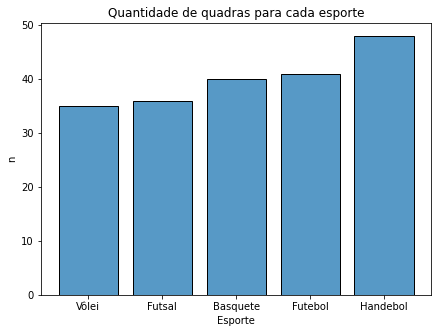

In [4]:
fig, ax = plt.subplots(figsize = (7, 5))

sns.histplot(data = flt, 
             x = 'tipo',
             shrink = 0.8,
             ax = ax)

ax.set(title = "Quantidade de quadras para cada esporte",
       xlabel = "Esporte",
       ylabel = "n")

Note que o número de quadras de Handebol se destaca, com quase 15 unidades a mais que o esporte com menor número de quadras. Por outro lado, o número de quadras de Futebol e Basquete são praticamente iguais, e a mesma situação ocorre quando se trata de Futsal e Vôlei.

Mais importante do que o número de quadras é, na verdade, o cruzamento dessa informação com a descrição de cada uma. Isso pode evidenciar, na prática, uma série de informações a respeito das demandas dos jogadores, supondo que os locadores atendam às demandas dos clientes: 

[Text(0.5, 1.0, 'Descrição das quadras para cada esporte'),
 Text(0.5, 0, 'Esporte'),
 Text(0, 0.5, 'n')]

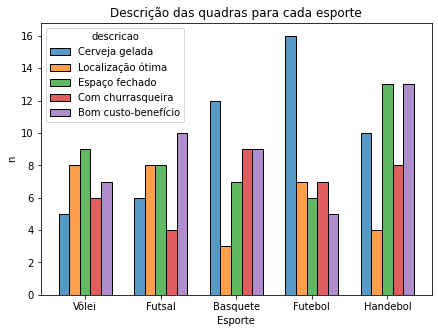

In [5]:
fig, ax = plt.subplots(figsize = (7,5))

sns.histplot(data = flt, 
             x = 'tipo', hue = 'descricao',
             shrink = 0.7,
             multiple = 'dodge',
             ax = ax)

ax.set(title = "Descrição das quadras para cada esporte",
       xlabel = "Esporte",
       ylabel = "n")

É imediato notar que as quadras de Futebol se destacam pela oferta de cerveja gelada. É verdade que o mesmo ocorre nas quadras de Basquete, mas de forma menos expressiva. De fato, é possível supor que jogares de futebol tenham uma demanda maior por cerveja após as partidas do que os jogadores de outros esportes. No caso do Handebol, por exemplo, os locadores de quadras tendem a ver mais importância em ofertar espaços fechados (o que é verdadeiramente importante em esportes desse tipo, inclusive para resguardar a integridade física dos jogadores) e com bom-custo benefício.

Além disso, outra pergunta importante é se existe algum esporte para o qual o aluguel de quadras é mais caro. E, nesse caso, também podemos nos perguntar se existe algum grau desse fato e a média de estrelas das quadras. Vejamos a partir da análise dos dois gráficos a seguir:

In [6]:
agrupado = flt.groupby(['tipo']).mean().reset_index()
agrupado.head(10)

,tipo,estrelas,valor_hora
0,Basquete,2.225000,27.900000
1,Futebol,2.756098,25.414634
2,Futsal,2.166667,28.416667
3,Handebol,2.625000,26.895833
4,Vôlei,2.800000,31.371429


[Text(0.5, 1.0, 'Valor médio da hora do aluguel de quadras por estado'),
 Text(0.5, 0, 'Valor médio'),
 Text(0, 0.5, 'Estado')]

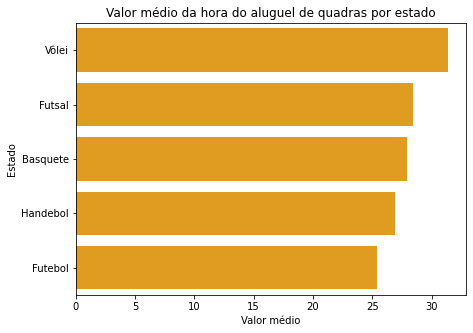

In [7]:
fig, ax = plt.subplots(figsize = (7,5))

sns.barplot(data = agrupado.sort_values(by = 'valor_hora', ascending = False),
            y = 'tipo', x = 'valor_hora',
            color = 'orange',
            ax = ax)

ax.set(title = "Valor médio da hora do aluguel de quadras por estado",
       xlabel = "Valor médio",
       ylabel = "Estado")

[Text(0.5, 1.0, 'Número médio de estrelas das quadras por estado'),
 Text(0.5, 0, 'Média de estrelas'),
 Text(0, 0.5, 'Estado')]

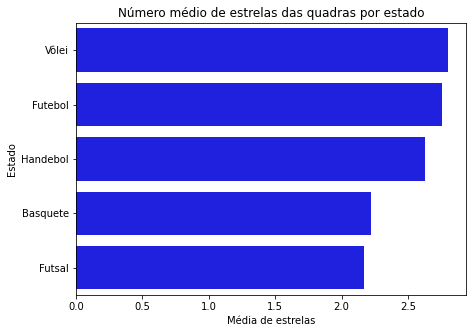

In [8]:
fig, ax = plt.subplots(figsize = (7,5))

sns.barplot(data = agrupado.sort_values(by = 'estrelas', ascending = False),
            y = 'tipo', x = 'estrelas',
            color = 'blue',
            ax = ax)

ax.set_title('Número médio de estrelas das quadras por estado')

ax.set(title = "Número médio de estrelas das quadras por estado",
       xlabel = "Média de estrelas",
       ylabel = "Estado")

Note que o valor médio da hora é mais caro no Vôlei e, de fato, o número médio de estrelas das quadras também é maior nesse esporte. No caso do Futsal, por outro lado, a média dos preços é a segunda maior, apesar de ter a pior média nas avaliações dos usuários. Outro ponto importante a se notar, inclusive, é que a média de estrelas é baixa em todos os esportes: sabendo que o máximo de estrelas é 5, mesmo a média mais alta (do Vôlei) é somente um pouco mais da metade. Ao mesmo tempo nota-se que o valor médio do aluguel é alto em todos os esportes, já que o valor mínimo de aluguel é de 5. É possível inferir, na prática, que o serviço de aluguel de quadras no cenário apontado pelo DataFrame em questão é inflacionado, e o custo-benefício é baixo em geral: afinal, o custo médio é alto e o número médio de estrelas é baixo.